In [12]:
#!pip install qiskit --upgrade
!pip install qiskit[visualization] --quiet

In [13]:
import math
import qiskit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit_aer.backends import AerSimulator
from qiskit.quantum_info import Statevector, random_statevector, Pauli, SparsePauliOp
from qiskit.visualization import plot_bloch_multivector
from qiskit.primitives import Estimator


# Exercise 3

In [14]:
def teleport(StateVector):

    circ_q = qiskit.QuantumRegister(3, name='q')
    circ_c = qiskit.ClassicalRegister(1, name='c')
    circ = qiskit.QuantumCircuit(circ_q, circ_c)
    circ.initialize(StateVector, circ_q[0])
    
    circ.h(circ_q[2])
    circ.cx(circ_q[2], circ_q[1])
    
    circ.barrier()
    circ.cx(circ_q[0], circ_q[1])
    circ.h(circ_q[0])
    
    circ.barrier()
    circ.measure(circ_q[1], circ_c)
    circ.x(circ_q[2]).c_if(circ_c, 1)
    
    circ.measure(circ_q[0], circ_c)
    circ.z(circ_q[2]).c_if(circ_c, 1)
    
    return circ

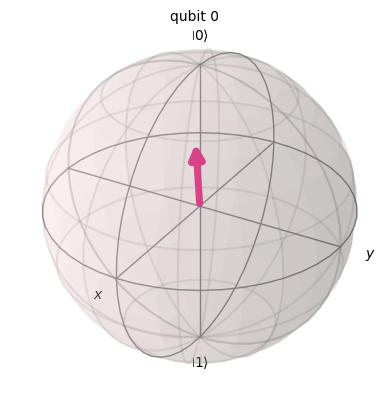

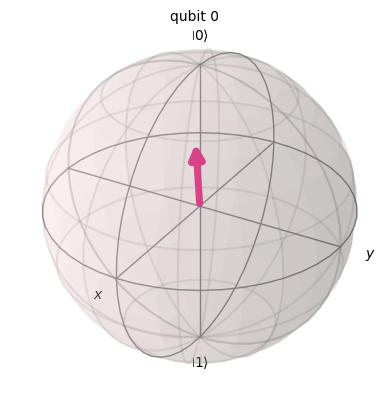

In [16]:
rand = random_statevector(2)
plot_bloch_multivector(rand)

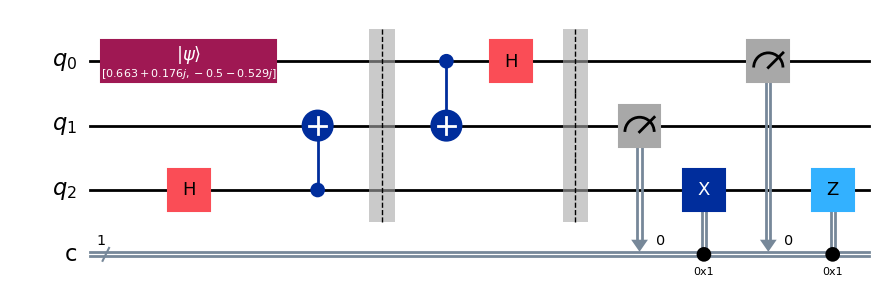

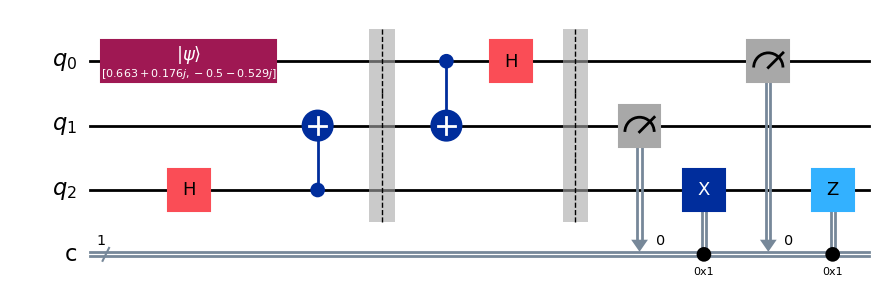

In [17]:
teleported_circuit = teleport(rand)

teleported_circuit.draw('mpl')

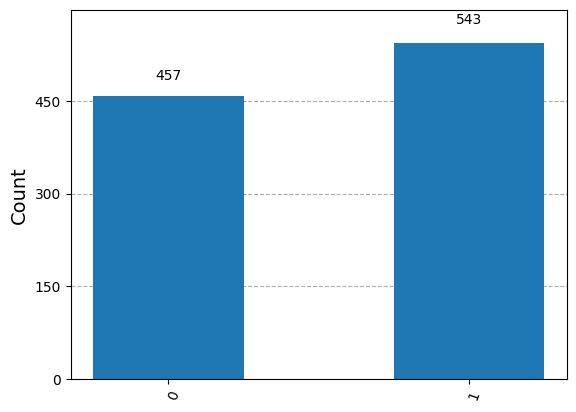

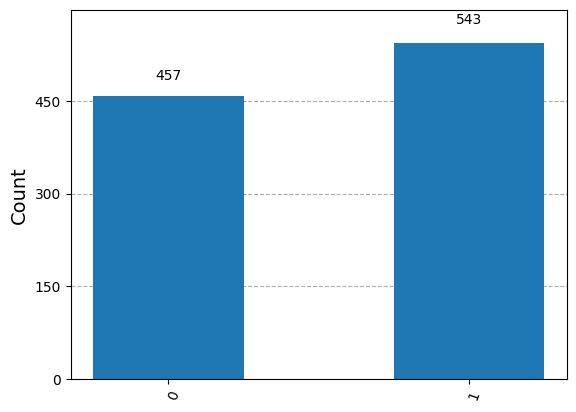

In [18]:
sim = AerSimulator(method="statevector")

N_shots = 1000  # number of measurements

teleported_circuit.save_statevector()  # save statevector at the end of the circuit
teleported_state = sim.run(teleported_circuit).result().get_statevector()

teleported_circuit.measure(2, 0)

result = sim.run(teleported_circuit, shots=N_shots).result()
counts = result.get_counts(teleported_circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

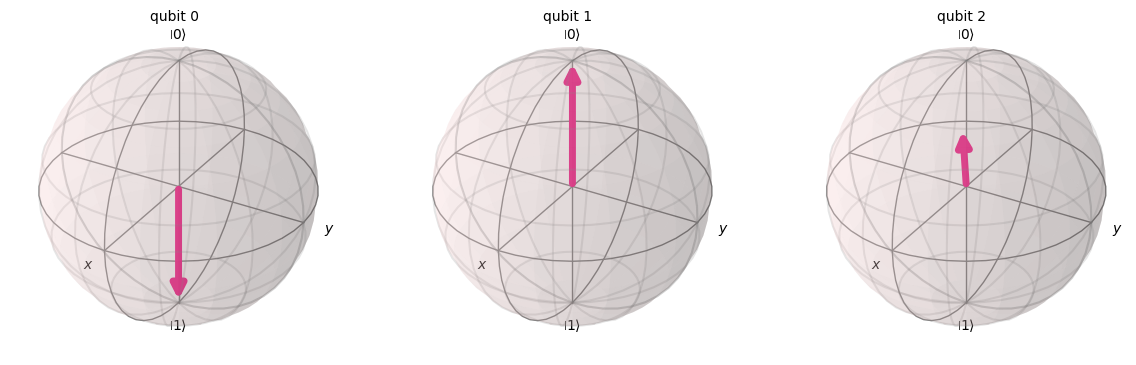

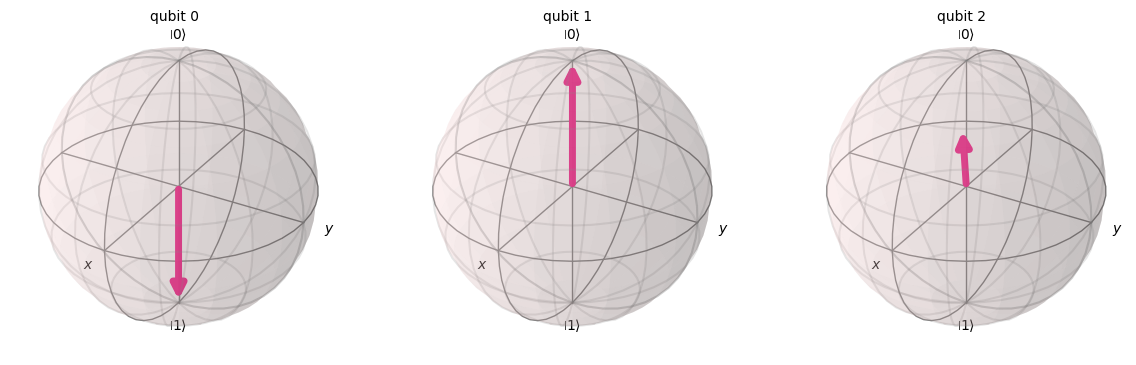

In [19]:
plot_bloch_multivector(teleported_state)

# Exercise 11

In [20]:
def parametrized_circuit(a, b):

    circ_q = qiskit.QuantumRegister(2, name='q')
    circ = qiskit.QuantumCircuit(circ_q)

    circ.h(1)
    circ.rzz(-2*b, circ_q[0], circ_q[1])
    circ.h(1)
    
    circ.barrier()
    circ.h(0)
    circ.rzz(-2*b, circ_q[0], circ_q[1])
    circ.h(0)
    
    circ.barrier()
    circ.rz(-2*a, circ_q[1])
    circ.rz(-2*a, circ_q[0])
 
    return circ


# Exercise 12

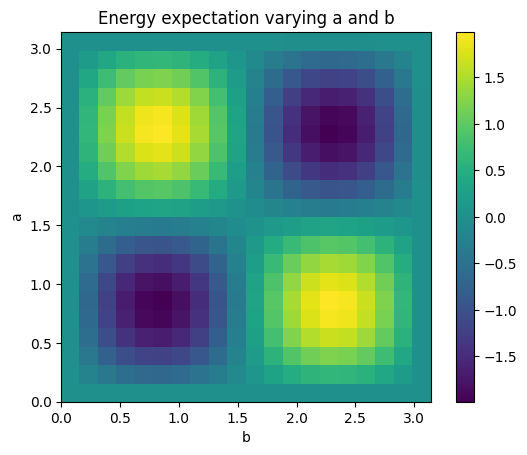

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp

estimator = Estimator()
 
H = SparsePauliOp.from_list([("XZ", -1), ("ZX", -1)])

nmbr_points = 20
a_array = np.linspace(0, np.pi, nmbr_points)
b_array = np.linspace(0, np.pi, nmbr_points)
expectation_value = np.zeros((nmbr_points, nmbr_points))

for a_id, a_val in enumerate(a_array):
    for b_id, b_val in enumerate(b_array):
        psi = parametrized_circuit(a_val, b_val)
        expectation_value[a_id, b_id] = estimator.run(psi, H).result().values[0]
 
plt.imshow(expectation_value, origin='lower', extent=[0, math.pi, 0, math.pi])
plt.colorbar()
plt.title("Energy expectation varying a and b")
plt.xlabel("b")
plt.ylabel("a")
plt.show()
